# Mn-Salinity relationship


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import pickle
from datetime import date
import matplotlib

%matplotlib inline

###### Parameters:

In [4]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

year  = 2013
month = 8

results_folder_nospm = f'/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-{year}_20210722-nospm/'
results_folder_spm   = f'/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-{year}_20210722-spm/'

# colours:
mod_CB     = '#006f99'
mod_CAA    = '#99c5d6'
land_color = "#8b7765"

###### Load files:

In [5]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])
tmask      = np.array(mesh.variables['tmask'][0,:,:,:])
Z_masked   = np.ma.masked_where((tmask > 0.1), tmask) 

Model results

In [6]:
c_spm   = nc.Dataset(f'{results_folder_spm}ANHA12_EXH006_{year}_monthly.nc', 'r')
c_nospm = nc.Dataset(f'{results_folder_nospm}ANHA12_EXH006_{year}_monthly.nc', 'r')

lat_model      = np.array(c_spm.variables['nav_lat'])
lon_model      = np.array(c_spm.variables['nav_lon'])
depths_model   = np.array(c_spm.variables['deptht'])
mn_model_spm   = np.array(c_spm.variables['dissolmn'])
mn_model_nospm = np.array(c_nospm.variables['dissolmn'])

In [9]:
S_file  = nc.Dataset(f'/data/brogalla/ANHA12/salinity_ave/ANHA12-EXH006_gridT_y2015m0{month}.nc')
S_model = np.array(S_file.variables['vosaline'])[0,:,imin:imax,jmin:jmax]

In [32]:
def plot_salinity(z=0):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y   = proj1(lon_model, lat_model) 
    CB     = proj1.contourf(x, y, S_model[z,:,:], levels=np.arange(20,36,2), extend='both')
    cbaxes = fig.add_axes([0.15, 0.22, 0.02, 0.2]) 
    CBar1  = plt.colorbar(CB, ax=ax1, cax=cbaxes, orientation='vertical', ticks=np.arange(20,36,2))
    CBar1.ax.tick_params(labelsize=5) 

    ax1.set_title(f'Depth level {z} -- {depths_model[z]:.2f} m', fontsize=7)
    
    return

##### Figure of separation of CB and CAA

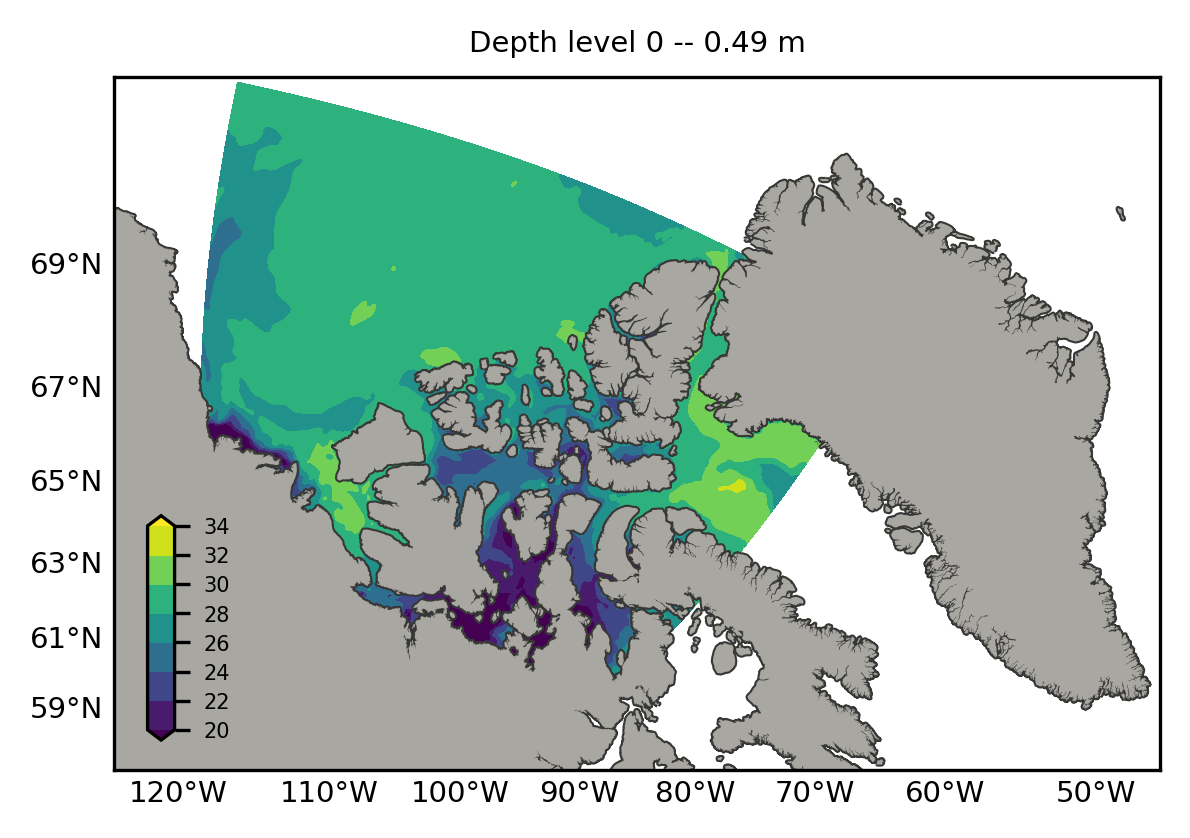

In [33]:
plot_salinity(z=0)

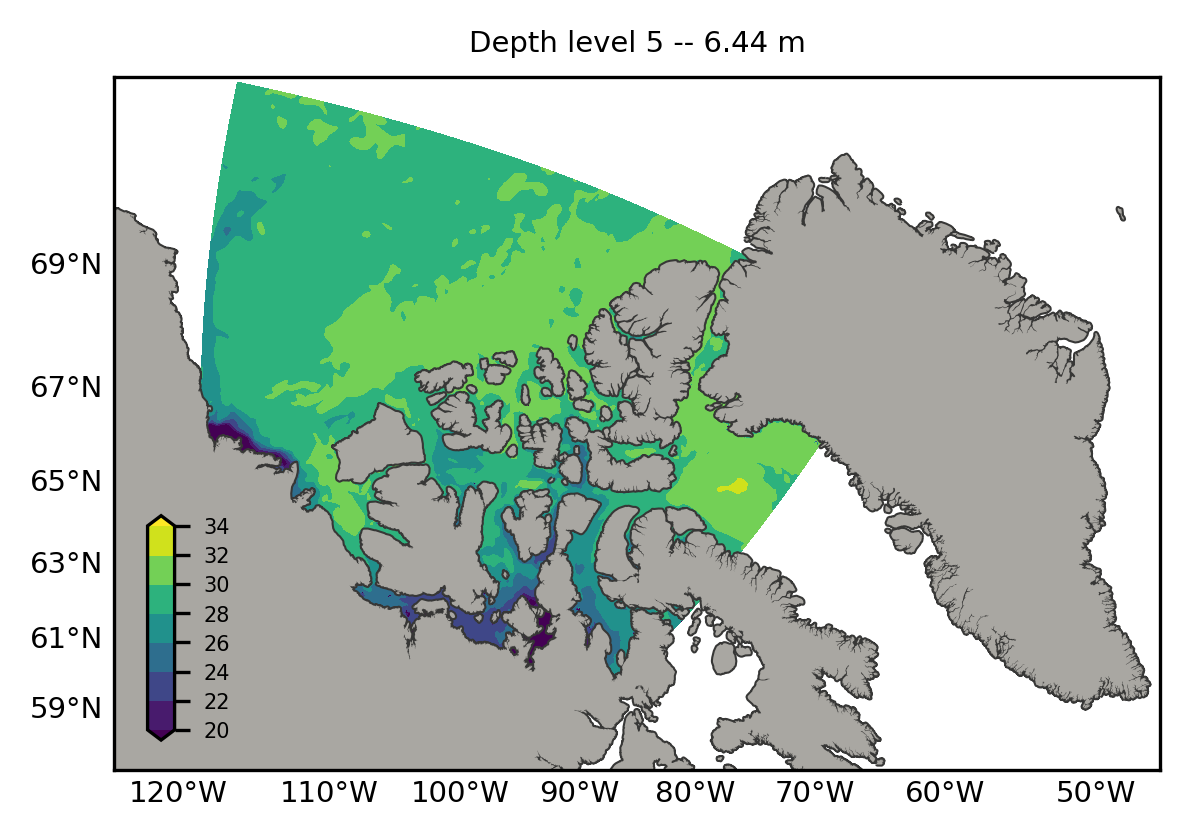

In [34]:
plot_salinity(z=5)

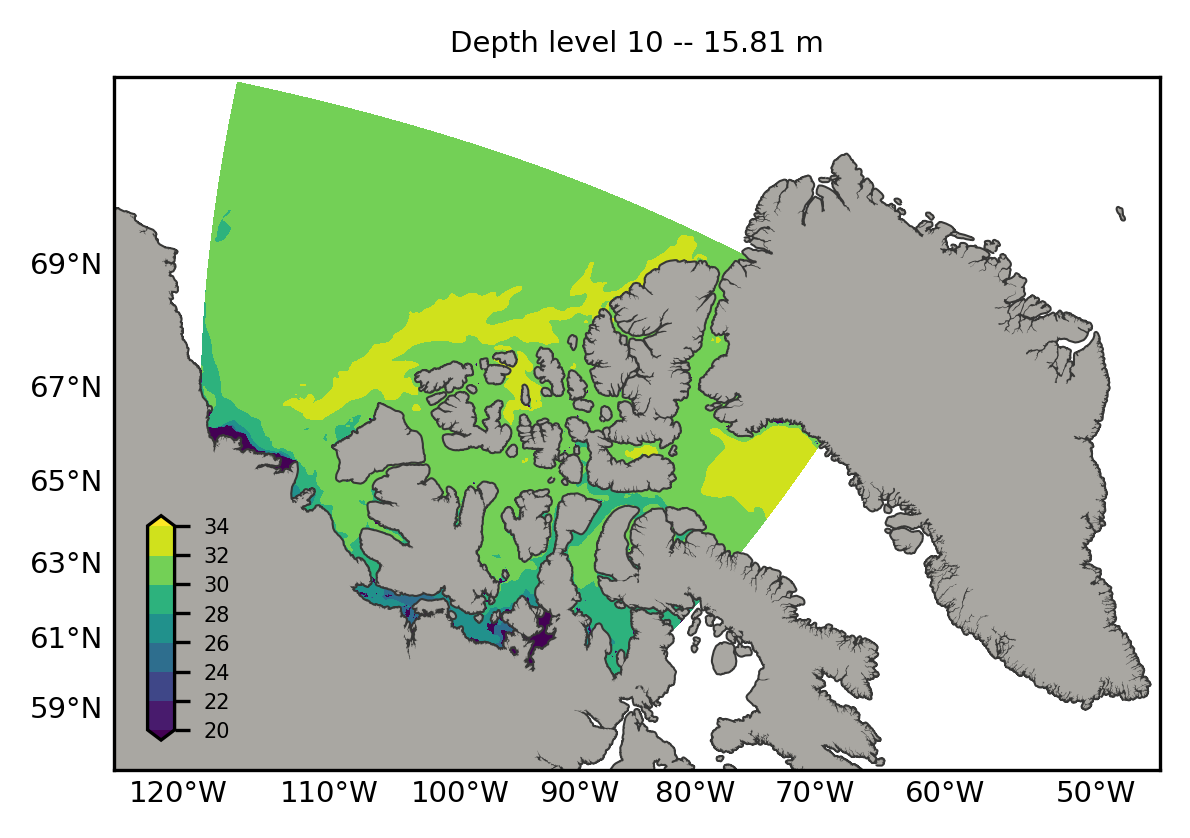

In [35]:
plot_salinity(z=10)

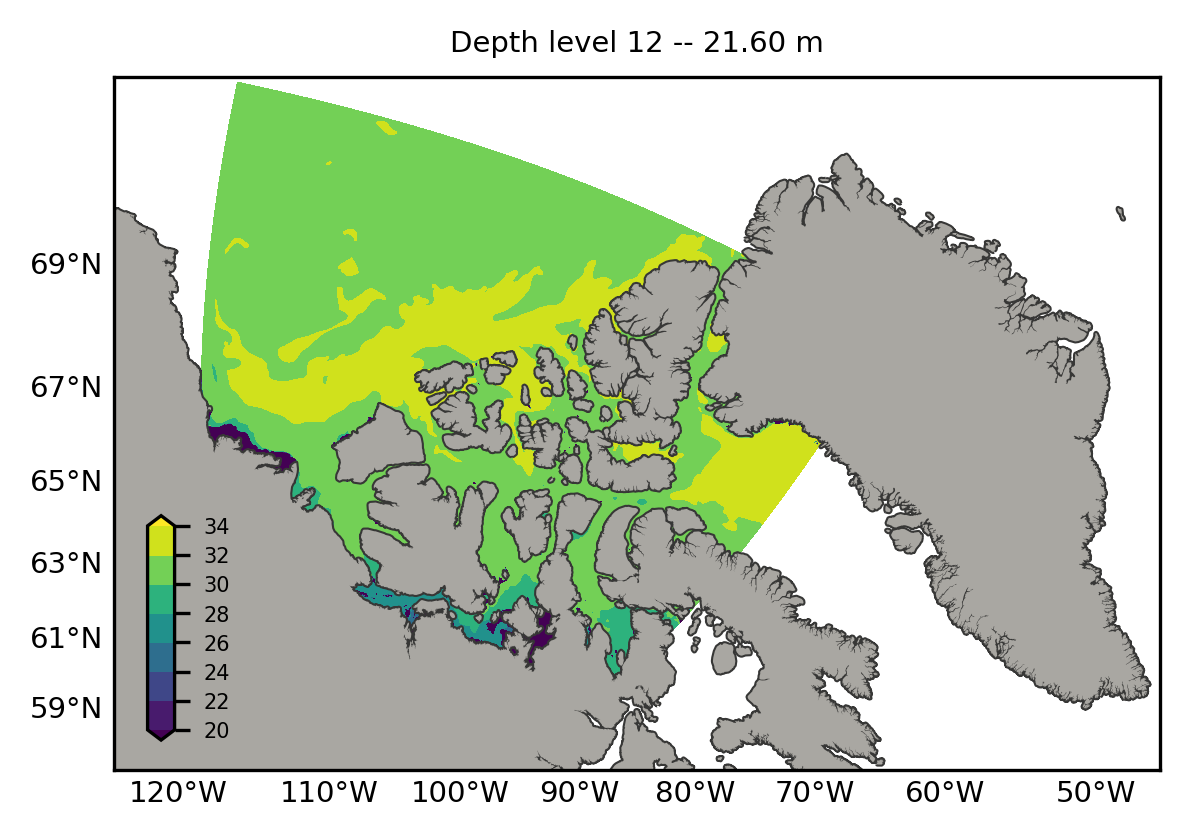

In [38]:
plot_salinity(z=12)

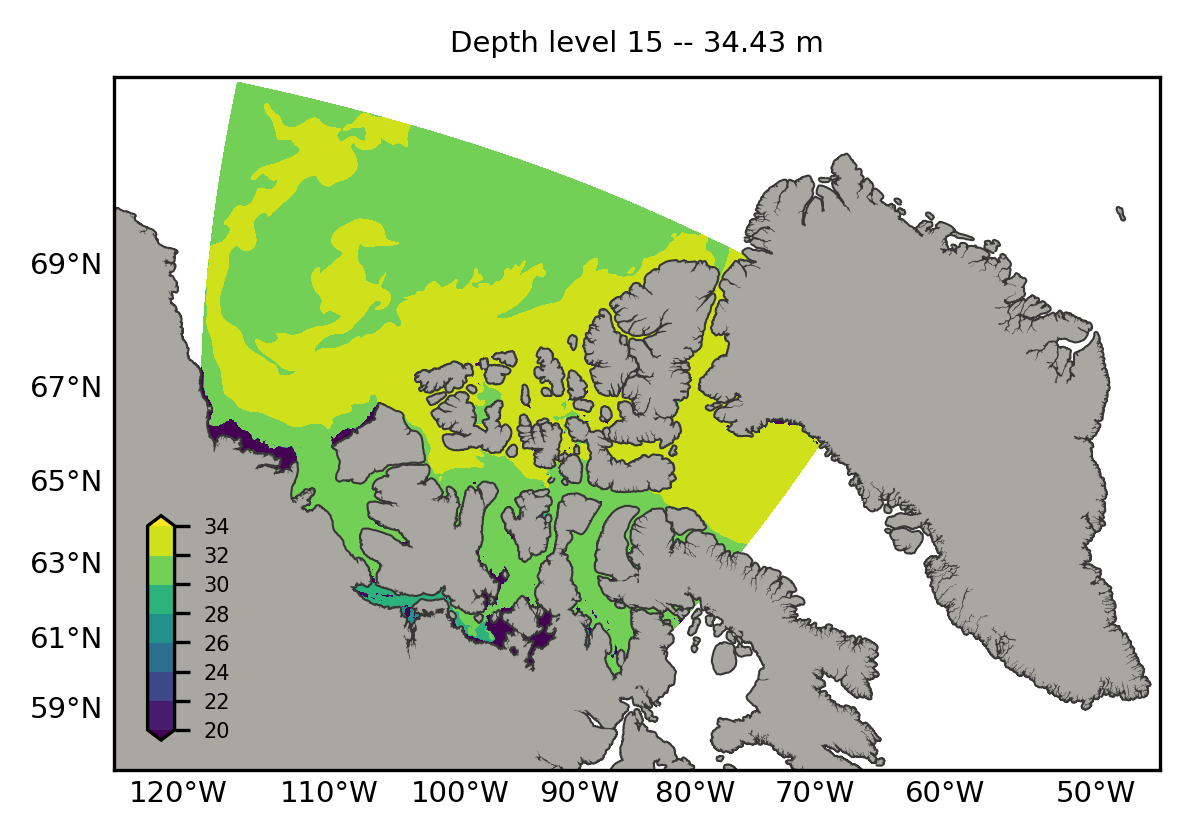

In [36]:
plot_salinity(z=15)

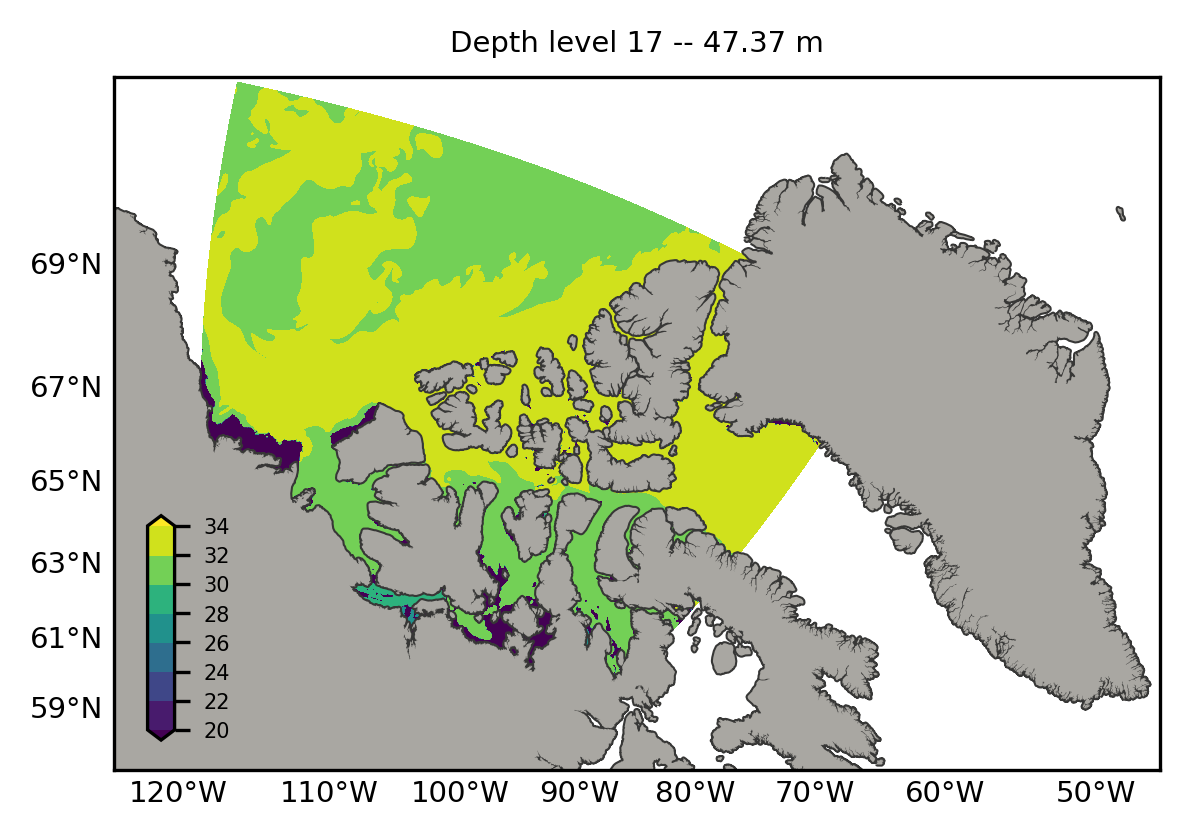

In [37]:
plot_salinity(z=17)